## Treinamento e Classificação dos Dados

Esse notebook visa o preparativo para o treinamento e classificação dos dados rotulados.

### Métricas coletadas:
- Consumo de CPU
- Consumo de Memóroa
- Pods encerrados por Estouro de memória (OOMKilled)
- Consumo excessivo de CPU




In [1]:
import pandas as pd
import hashlib
import glob
import os

## Carga do Arquivo de Dados

In [4]:
path_projeto = '/home/56740050368/Treinamento/IA-PUC_Minas/Trabalho_Cientifico'
path_dados = '/dados/metrics/cpu_memoria_rotulado.csv'
csv_file = path_projeto+path_dados
data = pd.read_csv(csv_file)        
data

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria,classe,flavor
0,00192f6f6f4e5a93d8d562202c6d0227,0.916936,1.031100,485.265625,485.390625,1,f4
1,0024f1a3bde07d1c2849af7a4e2b05f2,0.411342,0.449723,30.335938,30.460938,3,f0
2,00397e755d86f88d58f23419ce8ba8e8,0.001536,0.002612,11.078125,11.082031,3,f0
3,003c3255c6f292d40085b45189c83b23,0.115973,0.146571,241.890625,241.906250,5,f2
4,004428b1faa8b72bc0d20064b5f005e0,0.002421,0.005926,3.343750,3.531250,3,f0
...,...,...,...,...,...,...,...
6940,ffab0a2627a30b7caef9bb3c2ad72314,0.000646,0.000783,1.714844,1.714844,3,f0
6941,ffaf08c9bc5fb2ed3665bd9b0e4f9389,0.619316,0.682982,300.304688,307.144531,5,f3
6942,ffbff6083eb234b26af881f5adbde374,1.170667,1.492713,331.789062,331.859375,1,f3
6943,ffc59295b896b7b22280d0bf1be0699d,0.057966,0.158400,32.550781,32.792969,3,f0


## Seleção das colunas de interesse para treinameto

- mediana_cpu
- pico_cpu
- mediana_memoria
- pico_memoria
- flavor 

In [63]:
# Processamento de dados de memória
amostra = data[['hash', 'mediana_cpu', 'pico_cpu', 'mediana_memoria', 'pico_memoria', 'flavor']]
amostra

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria,flavor
0,00192f6f6f4e5a93d8d562202c6d0227,0.916936,1.031100,485.265625,485.390625,f4
1,0024f1a3bde07d1c2849af7a4e2b05f2,0.411342,0.449723,30.335938,30.460938,f0
2,00397e755d86f88d58f23419ce8ba8e8,0.001536,0.002612,11.078125,11.082031,f0
3,003c3255c6f292d40085b45189c83b23,0.115973,0.146571,241.890625,241.906250,f2
4,004428b1faa8b72bc0d20064b5f005e0,0.002421,0.005926,3.343750,3.531250,f0
...,...,...,...,...,...,...
6940,ffab0a2627a30b7caef9bb3c2ad72314,0.000646,0.000783,1.714844,1.714844,f0
6941,ffaf08c9bc5fb2ed3665bd9b0e4f9389,0.619316,0.682982,300.304688,307.144531,f3
6942,ffbff6083eb234b26af881f5adbde374,1.170667,1.492713,331.789062,331.859375,f3
6943,ffc59295b896b7b22280d0bf1be0699d,0.057966,0.158400,32.550781,32.792969,f0


<AxesSubplot:ylabel='Frequency'>

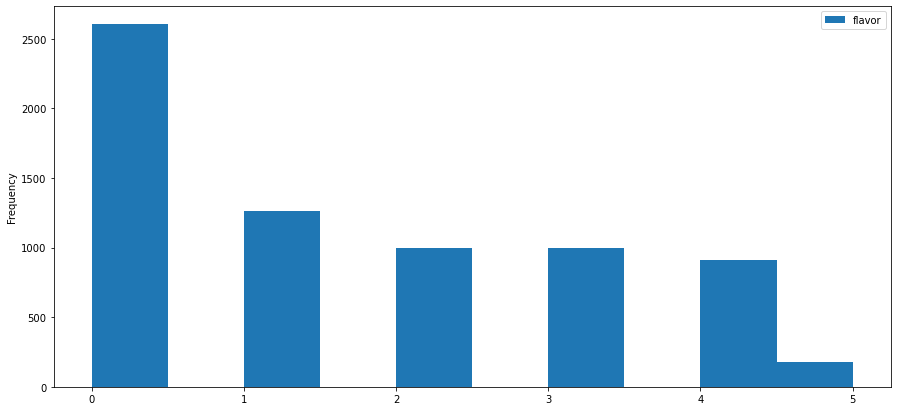

In [64]:
amostra_flavor = amostra[['flavor']]
amostra_flavor = amostra_flavor.rename(columns={'flavor':'id'})
amostra_flavor['flavor'] = amostra_flavor['id'].apply(lambda x: int(x[1:2]))
amostra_flavor.plot.hist(column=["flavor"], figsize=(15,7))

## Seleção de amostra para treinamento e teste

- https://medium.com/turing-talks/turing-talks-17-modelos-de-predi%C3%A7%C3%A3o-decision-tree-610aa484cb05
- https://www.geeksforgeeks.org/stratified-sampling-in-pandas/

In [80]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [84]:
# Estratificação da amostra para treinamento e testes
# Considera 80% aleatorio da amostra para treino e 20% para testes
# A seleção amostral é proporcional ao tipo de flavor mantendo a mesma proporção encontrada na amostra.
# Usa a técnica de estratificação
amostra_train = amostra.groupby('flavor', group_keys=False).apply(lambda x: x.sample(frac=0.8))
amostra_train

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria,flavor
5196,be99755b63b77021fa06d2199551efad,0.000953,0.020858,2.671875,2.679688,f0
4350,9f83cade02f200bb3e50b1cd95af82f5,0.052769,0.067873,3.859375,3.878906,f0
4644,aacb8f81549e4836e67ab8e14ac6836b,0.021027,0.104520,21.437500,21.468750,f0
2356,5539132d031f1466776942ae230f1489,0.335185,0.657757,15.851562,16.179688,f0
3639,83954e3a177dc13a10cb3fb712bdf16d,0.000653,0.000653,1.753906,1.753906,f0
...,...,...,...,...,...,...
655,179b07e39501b33843cff1896b2f349a,4.994394,52.608648,395.566406,535.835938,f5
6211,e3fecfebafd30eb0f3fd029c6f297918,2.350877,9.167933,378.589844,527.753906,f5
1058,25f10ba351f81e3b35a85dccc3dc3617,1.140682,1.317543,500.625000,500.777344,f5
3705,86730bf280739536c7ca87d02081a10a,0.887734,0.978391,506.988281,507.128906,f5


In [85]:
# X_test é o complemento entre a amostra e X_train     
amostra_test  = pd.merge(amostra, amostra_train, how='outer',on=['hash', 'hash'])
amostra_test = amostra_test[amostra_test.isnull().any(axis=1)]
amostra_test = amostra_test[['hash', 'mediana_cpu_x', 'pico_cpu_x', 'mediana_memoria_x', 'pico_memoria_x', 'flavor_x']]
# Renomeia as colunas
amostra_test.rename(columns={"mediana_cpu_x": "mediana_cpu", "pico_cpu_x": "pico_cpu", "mediana_memoria_x":"mediana_memoria", "pico_memoria_x": "pico_memoria", "flavor_x": "flavor"}, inplace=True)
amostra_test

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria,flavor
2,00397e755d86f88d58f23419ce8ba8e8,0.001536,0.002612,11.078125,11.082031,f0
3,003c3255c6f292d40085b45189c83b23,0.115973,0.146571,241.890625,241.906250,f2
7,0066c35252c12588ffbc2882cda6f3c0,0.009680,0.012783,3.097656,3.097656,f0
8,006a91c9f26bdf9cd595f1daadd2af58,0.614395,1.453081,189.054688,189.242188,f1
9,0086ae9e44b1dd47e70cb4b0a2220b53,0.028100,0.124925,1.800781,1.800781,f0
...,...,...,...,...,...,...
6926,feda8c258be898232cfde35904bc520b,1.426612,1.666057,36.304688,38.148438,f1
6934,ff457f0f69b3170db5acc543ee214c0d,1.947729,5.183736,424.707031,433.371094,f4
6935,ff4c0e708270c5b73b7b36e5ce18a8b5,0.330027,0.362485,67.085938,67.085938,f0
6939,ffa7b571d4961a937abf19a56b76c6f1,0.007171,0.008017,4.015625,4.105469,f0


## Conjuntos de Treino e Testes

In [86]:
## Conjunto de Treino
y_train = amostra_train[['flavor']]
y_train.head()

,flavor
5196,f0
4350,f0
4644,f0
2356,f0
3639,f0


In [87]:
X_train = amostra_train[['mediana_cpu', 'pico_cpu', 'mediana_memoria', 'pico_memoria']]
X_train.head()

,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria
5196,0.000953,0.020858,2.671875,2.679688
4350,0.052769,0.067873,3.859375,3.878906
4644,0.021027,0.104520,21.437500,21.468750
2356,0.335185,0.657757,15.851562,16.179688
3639,0.000653,0.000653,1.753906,1.753906


In [88]:
# Conjuntos de Teste
y_test = amostra_test[['flavor']]
y_test.head()

,flavor
2,f0
3,f2
7,f0
8,f1
9,f0


In [89]:
X_test = amostra_test[['mediana_cpu', 'pico_cpu', 'mediana_memoria', 'pico_memoria']]
X_test.head()

,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria
2,0.001536,0.002612,11.078125,11.082031
3,0.115973,0.146571,241.890625,241.906250
7,0.009680,0.012783,3.097656,3.097656
8,0.614395,1.453081,189.054688,189.242188
9,0.028100,0.124925,1.800781,1.800781


## Árvore de decisão

In [81]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

In [90]:
tree = clf.fit(X_train, y_train)

In [91]:
# Predição
def predict(model, param1, param2, param3, param4):
    parameters = [param1, param2, param3, param4]
    print(f'Predicao para os parâmetros [{param1}, {param2}, {param3}, {param4}] => flavor {model.predict([parameters])[0]}')

In [92]:
## Predições baseadas no conjunto de Teste
amostra_test.head()

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria,flavor
2,00397e755d86f88d58f23419ce8ba8e8,0.001536,0.002612,11.078125,11.082031,f0
3,003c3255c6f292d40085b45189c83b23,0.115973,0.146571,241.890625,241.906250,f2
7,0066c35252c12588ffbc2882cda6f3c0,0.009680,0.012783,3.097656,3.097656,f0
8,006a91c9f26bdf9cd595f1daadd2af58,0.614395,1.453081,189.054688,189.242188,f1
9,0086ae9e44b1dd47e70cb4b0a2220b53,0.028100,0.124925,1.800781,1.800781,f0


In [93]:
predict(tree, 0.001536, 0.002612, 11.078125, 11.082031)

Predicao para os parâmetros [0.001536, 0.002612, 11.078125, 11.082031] => flavor f0


/home/56740050368/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [94]:
predict(tree, 0.115973, 0.146571, 241.890625, 241.906250)

Predicao para os parâmetros [0.115973, 0.146571, 241.890625, 241.90625] => flavor f2


/home/56740050368/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Cross Validation

In [96]:
allScores = cross_val_score(clf, X_test, y_test , cv=50)
# cross_val_score retorna array com as 10 validações
allScores.mean() # tomamos a média do score

/home/56740050368/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 36 members, which is less than n_splits=50.
  warnings.warn(


0.9906613756613757